# Extended Golay code [24,12,8]

#### cool class for working with graphs

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import my_lib
import graph_lib

### generating a corrective matrixes

In [30]:
(G, H) = my_lib.get_G_H_matrixes();

print(G)
print()
print(H)

[[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1]]

[[1 0 0 1 1 1 1 1 0 0 0 1]
 [0 1 0 0 1 1 1 1 1 0 1 0]
 [0 0 1 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 1 0]
 [1 1 0 0 1 0 0 1 1 1 0 1]
 [1 1 1 0 0 1 0 0 1 1 1 0]
 [1 1 1 1 0 0 1 0 0 1 0 1]
 [1 1 1 1 1 0 0 1 0 0 1 0]
 [0 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 1 1 1 1 1 0 0 1 1 0]
 [0 1 0 1 0 1 0 1 0 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 

### some functions for working with binary codewords

In [31]:
bin_nums = my_lib.get_bin_nums_matrix();

print(bin_nums);

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 0]
 ..., 
 [1 1 1 ..., 1 0 1]
 [1 1 1 ..., 1 1 0]
 [1 1 1 ..., 1 1 1]]


## Getting all codewords of Golay's code

In [32]:
'''def get_codewords(Din, G):
    Code_words = np.ndarray(shape = (Din.shape[0], 24), dtype=np.int);
    Code_words = bin_multipl(Din, G);
    return Code_words;'''

'def get_codewords(Din, G):\n    Code_words = np.ndarray(shape = (Din.shape[0], 24), dtype=np.int);\n    Code_words = bin_multipl(Din, G);\n    return Code_words;'

In [33]:
all_code_words = my_lib.get_codewords(bin_nums, G);

print(all_code_words);

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 1 0 0]
 [1 1 1 ..., 1 1 1]]


### calculating a statistic on words with the same weights

In [34]:
weight = np.zeros(4096)
hst = np.zeros(25, dtype=np.int)
print (hst)
#arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
for i in range(0, 4096):
    weight[i] = my_lib.bin_weight(all_code_words[i]);
print (weight)

for i in range(0, 4096):
    for j in range (0, 25):
        if weight[i] == j:
            hst[j] += 1

#plt.hist(weight)
#plt.show(weight)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0.   8.   8. ...,  16.  16.  24.]


In [35]:
print (hst)

[   1    0    0    0    0    0    0    0  759    0    0    0 2576    0    0
    0  759    0    0    0    0    0    0    0    1]


In [36]:
print(weight);            

[  0.   8.   8. ...,  16.  16.  24.]


### Choosing all codewords with weight 8

In [37]:
codewords_w_eight = my_lib.get_words_of_weight_eight(all_code_words);

print(codewords_w_eight);

file = open("codewords_w_eight", "w");
for i in np.arange(0, codewords_w_eight.shape[0], 1):
    line = "";
    for j in np.arange(0, codewords_w_eight.shape[1]-1, 1):
        line += str(int(codewords_w_eight[i][j]))+", "
    line += str(int(codewords_w_eight[i][codewords_w_eight.shape[1]-1]))+"\n";
    file.write(line);
file.close();

[[0 0 0 ..., 0 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 1 1 0]
 [1 1 1 ..., 0 0 0]]


### Creating a list with all edges in graph 
edge between node "1" and "2" means that the Hamming distance between codewords "1" and "2" is not less than 12

In [38]:
file = open("edge_list.txt", "w");

for i in np.arange(0, codewords_w_eight.shape[0]-1, 1):
    for j in np.arange(i+1, codewords_w_eight.shape[0], 1):
        if(my_lib.hamming_dist(codewords_w_eight[i], codewords_w_eight[j]) >= 12):
            line = str(i)+" "+str(j)+"\n";
            file.write(line);
file.close();

### Creating connectivity matrix and connectivity list of the graph

In [39]:
connectivity_matrix = my_lib.get_connectivity_matrix(codewords_w_eight);

print(connectivity_matrix);

[[1 1 0 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 [0 0 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 0 0]
 [1 1 1 ..., 0 1 0]
 [1 1 1 ..., 0 0 1]]


In [40]:
connectivity_list = my_lib.get_connectivity_list(codewords_w_eight);

print(connectivity_list[0:2]);

[[1, 12, 17, 22, 23, 24, 31, 34, 39, 40, 41, 44, 51, 54, 57, 62, 63, 64, 67, 72, 73, 74, 75, 76, 77, 82, 85, 92, 95, 96, 97, 100, 101, 102, 103, 104, 105, 108, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 126, 127, 128, 129, 136, 137, 140, 141, 144, 145, 146, 147, 148, 153, 156, 157, 158, 161, 162, 163, 166, 167, 170, 173, 174, 175, 176, 177, 178, 179, 180, 181, 184, 185, 186, 189, 192, 193, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 209, 216, 217, 220, 221, 222, 229, 230, 233, 234, 237, 240, 241, 242, 245, 248, 249, 250, 253, 254, 255, 256, 257, 258, 259, 260, 261, 264, 265, 266, 269, 270, 271, 272, 273, 274, 275, 276, 279, 280, 283, 284, 285, 286, 287, 288, 289, 292, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 334, 339, 340, 341, 344, 349, 350, 355, 356, 357, 358, 359, 360, 361, 362, 365, 366, 367, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 384, 387, 388, 

### Visualisation of connectivity matrix

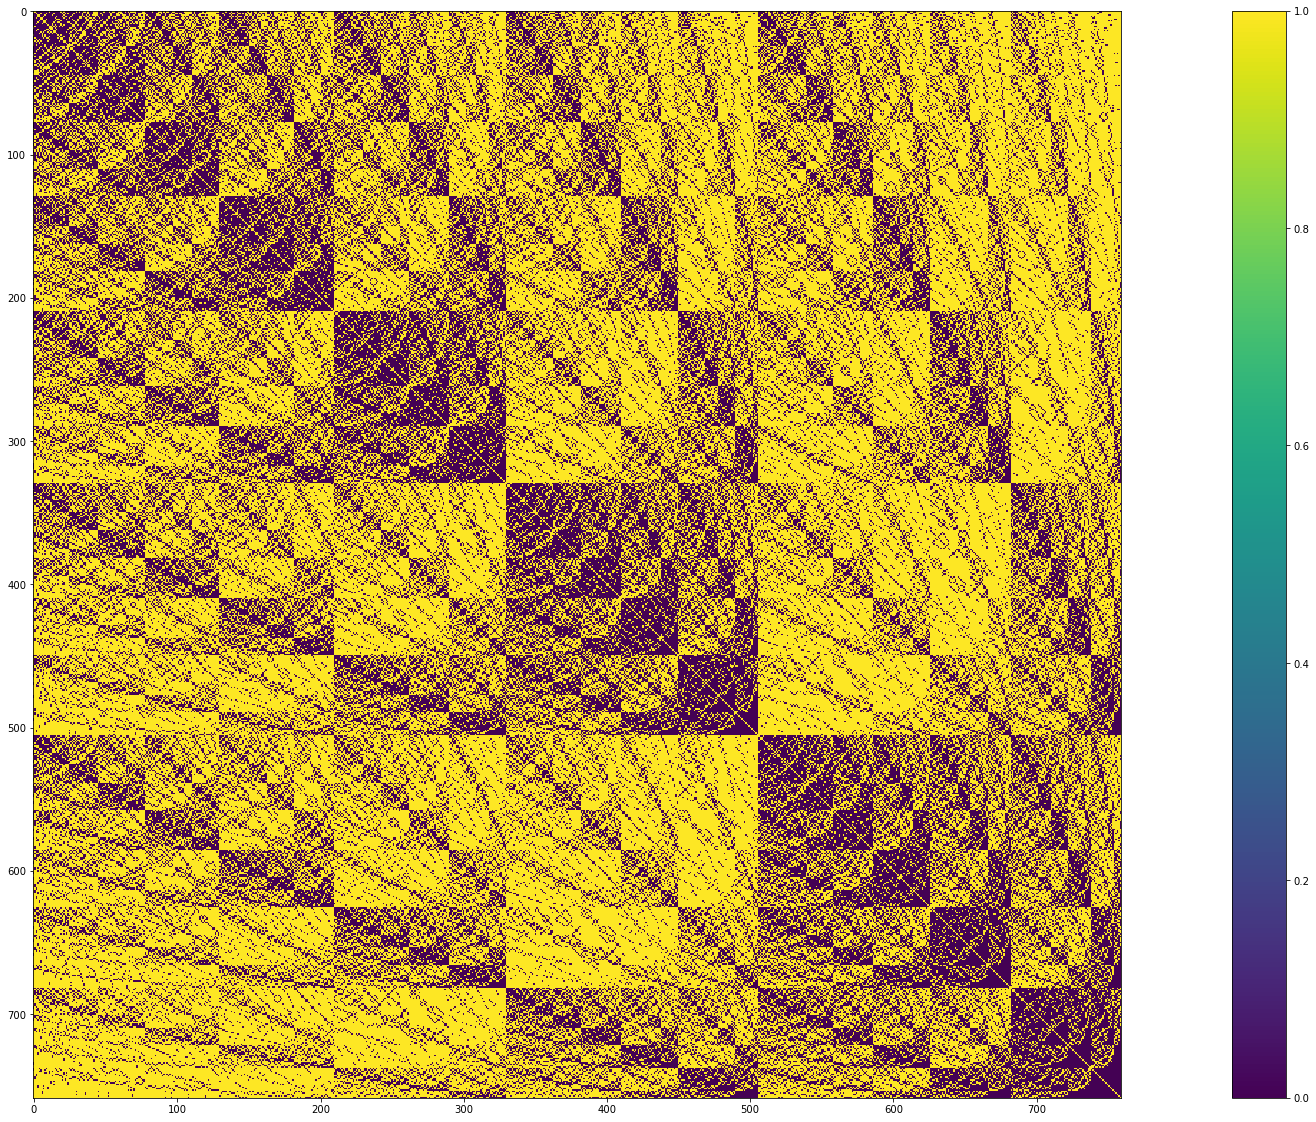

In [41]:
# just good pic
plt.figure(figsize=(40,20))

plt.imshow(connectivity_matrix)

plt.colorbar()

plt.show()


## Search cliques in the graph of codewords of length 8 with a minimum distance of 12

In [42]:
Big_graph = graph_lib.graph()
Big_graph.readFromEdgeList("edge_list.txt");

In [43]:
Cliques = Big_graph.find_some_cliques(9);
file = open("Cliques_9.txt", "w");
file.write(str(Cliques));
file.close();
print(Cliques);

[{'521', '752', '156', '700', '407', '315', '294'}, {'247', '752', '156', '700', '407', '185'}, {'661', '171', '334'}, {'521', '752', '156', '700', '353', '315', '294'}, {'521', '700', '353', '269', '259', '328'}, {'515', '353', '328'}, {'474', '247', '185', '601', '407', '515'}, {'24', '526', '420', '752', '407', '294'}, {'24', '171', '526', '752', '385', '259', '294'}, {'24', '52', '752', '179', '353', '294'}, {'623', '521', '247', '752', '156', '700'}, {'623', '171', '247', '385', '700', '241'}, {'623', '171', '700', '269', '231', '376'}, {'623', '171', '700', '353', '241', '269'}, {'623', '521', '752', '156', '700', '353', '315'}, {'623', '521', '171', '752', '700', '353', '259'}, {'623', '24', '171', '743', '353', '259'}, {'623', '521', '247', '465', '752', '156'}, {'623', '171', '247', '465', '752', '515', '376'}, {'623', '247', '752', '465', '200', '515', '376'}, {'623', '247', '420', '752', '465', '200', '515'}, {'623', '341', '700', '353', '269', '315'}, {'623', '341', '171', 

In [44]:
#{'758', '121', '696', '404', '237', '130', '40', '648', '133'}
#{'548', '574', '589', '270', '379', '233', '391', '499', '141'}
#{'87', '385', '700', '609', '747', '328', '17', '156', '231'}

In [45]:
clique_of_9_words = np.ndarray(shape = (9,24), dtype=np.int);
nums = [758, 121, 696, 404, 237, 130, 40, 648, 133];

file = open("clique_of_9_words.txt", "w");
j=0;
for i in nums:
    file.write(str(codewords_w_eight[i])+"\n");
    clique_of_9_words[j] = codewords_w_eight[i];
    j +=1;
file.close();

In [46]:
print(clique_of_9_words)

[[1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1]
 [0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1]
 [1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0]]


# Yep! We found it :)